## Step 1 : Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore") 

In [3]:
# To align the graphs and charts in the middle

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Step 2 : Read the file and store into a variable

In [4]:
leads = pd.read_csv("Leads.csv")

In [5]:
#check if the data has loaded properly
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 3 : Inspection of data 

In [6]:
# Checking shape of the data
leads.shape

(9240, 37)

In [7]:
# check summary of numerical data 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check datatypes of various variables
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Checking for null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Step 4 : Data Preparation

In [10]:
# Check various values in the column with 51% missing values
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

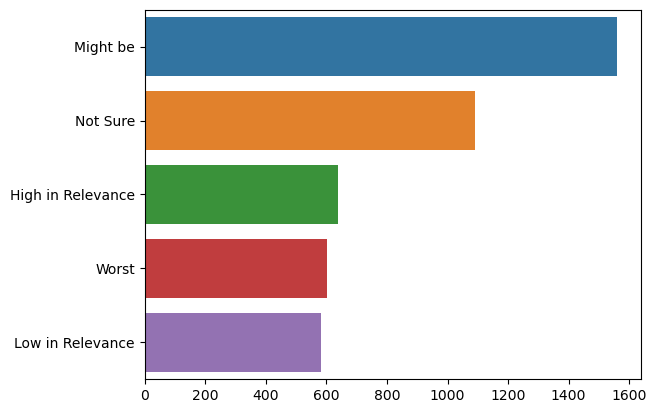

In [13]:
sns.barplot(leads['Lead Quality'].value_counts().values, leads['Lead Quality'].value_counts().index)
plt.show()

#### We can assign Not Sure value to the not available values as they are interpreted by the employess of the organisation and is the safest choice of all

In [14]:
leads['Lead Quality'].head(10)

0    Low in Relevance
1                 NaN
2            Might be
3            Not Sure
4            Might be
5                 NaN
6    Low in Relevance
7                 NaN
8                 NaN
9                 NaN
Name: Lead Quality, dtype: object

In [15]:
leads['Lead Quality'].fillna('Not Sure', inplace=True)

<Figure size 1000x1000 with 0 Axes>

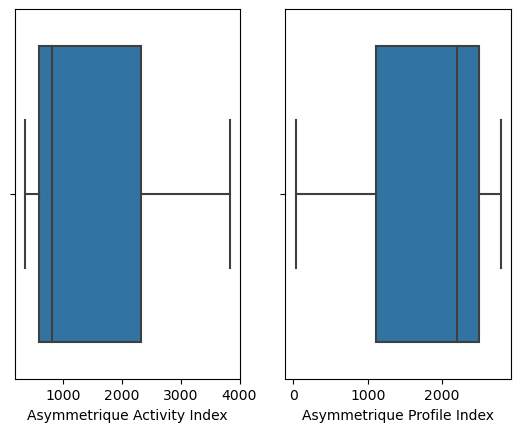

In [22]:
plt.figure(figsize = [10,10])
plt.subplots(3,3)
plt.subplot(1,2,1)
sns.boxplot(leads['Asymmetrique Activity Index'].value_counts())
plt.subplot(1,2,2)
sns.boxplot(leads['Asymmetrique Profile Index'].value_counts())
plt.show()

<Figure size 1000x1000 with 0 Axes>

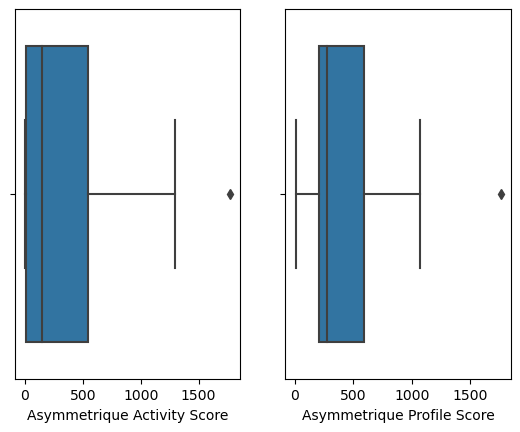

In [23]:
plt.figure(figsize = (10,10))
plt.subplots(3,3)
plt.subplot(1,2,1)
sns.boxplot(leads['Asymmetrique Activity Score'].value_counts())
plt.subplot(1,2,2)
sns.boxplot(leads['Asymmetrique Profile Score'].value_counts())
plt.show()

#### Since Asymmetrique Activity Score , Asymmetrique Profile Score, Asymmetrique Activity Index, Asymmetrique Profile Index have large number of null values, hence lets drop them

In [24]:
leads.drop(columns = ["Asymmetrique Activity Score", "Asymmetrique Profile Score", "Asymmetrique Activity Index", "Asymmetrique Profile Index"], inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Ringing,Not Sure,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [25]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### lets replace "What matters most to you in choosing a course" variable with the most common answer which is 'Better Career Prospects'

In [26]:
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [27]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### lets replace "Lead Profile" variable with the most common answer which is 'Select'

In [28]:
leads['Lead Profile'].fillna(leads['Lead Profile'].mode()[0], inplace=True)

In [29]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### lets replace "Tags" variable with "Still Thinking" as it interpreted by our employees.

In [30]:
leads['Tags'].fillna("Still Thinking", inplace=True)

In [31]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### lets replace "What is your current occupation" variable with "Other" as it is unknown.

In [32]:
leads['What is your current occupation'].fillna("Other", inplace=True)

In [33]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Lets replace "Country" variable with most common answer which is "India".

In [34]:
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

In [35]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### Lets replace "How did you hear about X Education" variable with most common answer which is "Select".

In [36]:
leads['How did you hear about X Education'].fillna(leads['How did you hear about X Education'].mode()[0], inplace=True)

In [37]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Lets replace "Specialization" with "Select" value which is most common answer as well.

In [38]:
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Finance Management')

In [39]:
leads['Specialization'].replace({"Select": "Finance Management"}, inplace=True)

In [40]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

#### Lets replace "Page Views Per Visit" with "0.00" value which is the most common answer.

In [41]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0], inplace=True)

In [42]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Lets replace "Last Activity" with "Email Opened" value which is the most common answer.

In [43]:
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace=True)

In [44]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Lets replace "Lead Source" with "Google" value which is the most common answer.

In [45]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)

In [46]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

#### Lets replace "TotalVisits" with "0.00" value which is the most common answer.

In [47]:
leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0], inplace=True)

In [48]:
print(leads['City'].value_counts(),"\n\n\n Null values : ",leads['City'].isnull().sum())

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64 


 Null values :  1420


#### lets NA values  and Select values in City column with "Mumbai" value which is the most common answer.

In [49]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [50]:
leads['City'].replace({"Select": "Mumbai"}, inplace=True)


#### Checking if null value still exists

In [51]:
# Checking for null values
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

#### Converting Yes to 1 and No to 0

In [52]:
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})
leads['Do Not Call'] = leads['Do Not Call'].map({'Yes': 1, 'No': 0})
leads['Receive More Updates About Our Courses'] = leads['Receive More Updates About Our Courses'].map({'Yes': 1, 'No': 0})
leads['Update me on Supply Chain Content'] = leads['Update me on Supply Chain Content'].map({'Yes': 1, 'No': 0})
leads['Get updates on DM Content'] = leads['Get updates on DM Content'].map({'Yes': 1, 'No': 0})
leads['I agree to pay the amount through cheque'] = leads['I agree to pay the amount through cheque'].map({'Yes': 1, 'No': 0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

#### Since Prospect ID and Lead Number are just identifying unique row and hence can be dropped.

In [53]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [54]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

#### Since Newspaper column has imbalanced data, hence can be dropped.

In [55]:
leads.drop(['Newspaper'], 1, inplace = True)

## Step 5 : Visualisation of data to understand if there are any outliers in the data

In [56]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

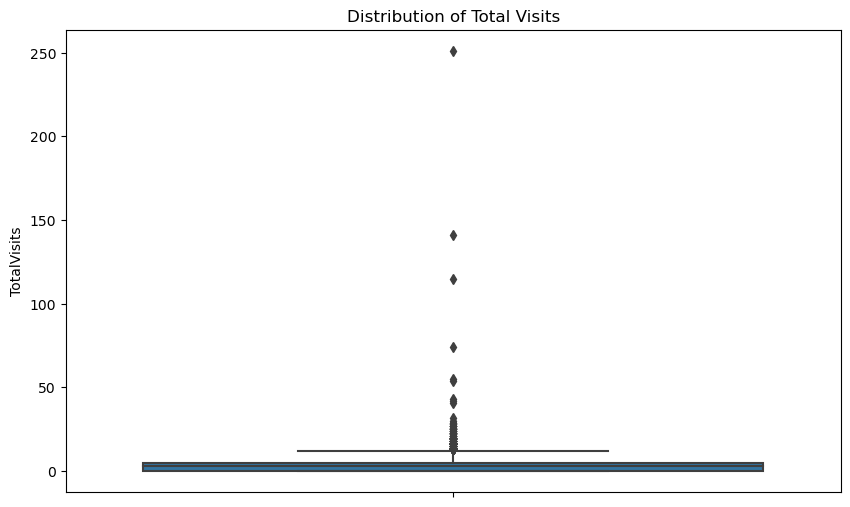

In [57]:
# check for outliers using boxplot
plt.figure(figsize=[10,6])
box = sns.boxplot(data=leads, y="TotalVisits")
plt.title('Distribution of Total Visits')
plt.show()

#### there are some outliers in TotalVisits hence it has to be pruned

In [58]:
## Outlier Handling
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

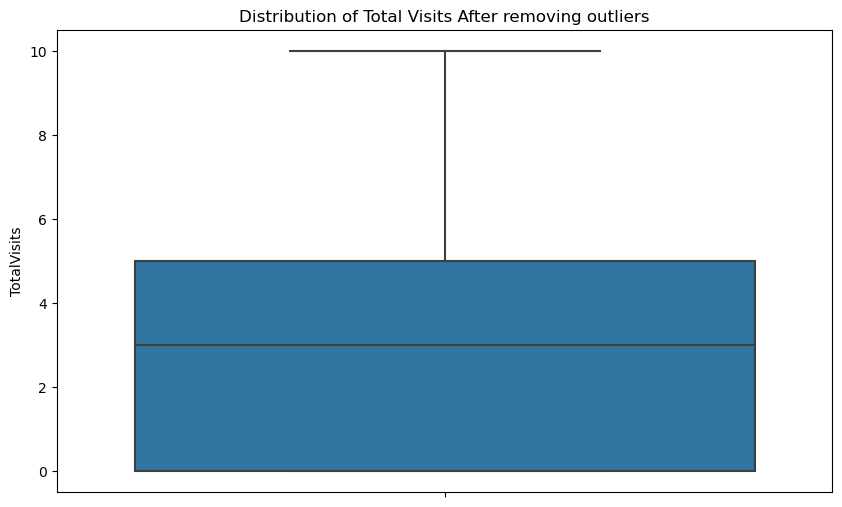

In [59]:
# Boxplot for TotalVisits after Outlier Handling
plt.figure(figsize=[10,6])
box = sns.boxplot(data=leads, y="TotalVisits")
plt.title('Distribution of Total Visits After removing outliers')
plt.show()

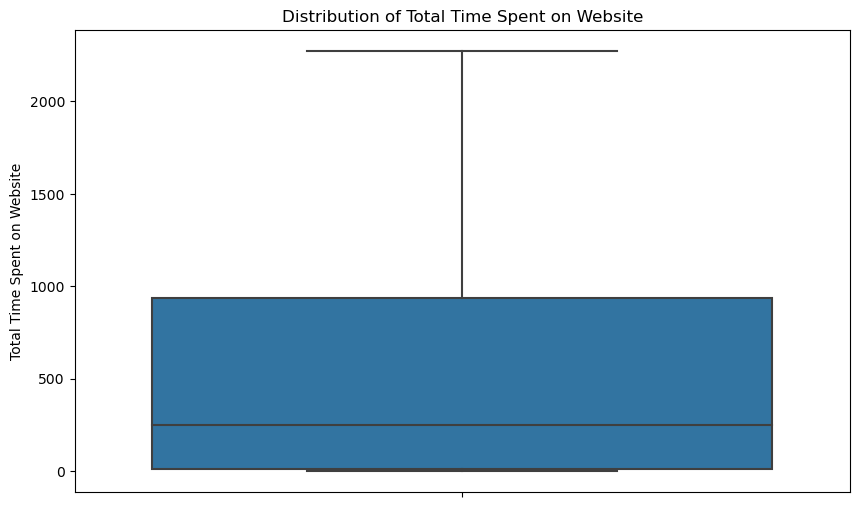

In [60]:
# Total Time Spent on Website  
plt.figure(figsize=[10,6])
box = sns.boxplot(data=leads, y="Total Time Spent on Website")
plt.title('Distribution of Total Time Spent on Website')
plt.show()

#### No Outliers seen for column Total Time Spent on Website  

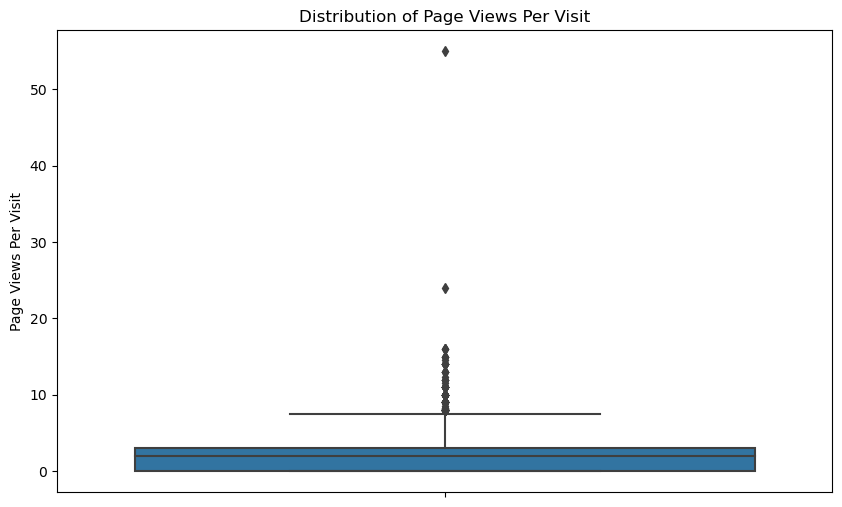

In [61]:
# Boxplot of Page Views Per Visit to check outliers
plt.figure(figsize=[10,6])
box = sns.boxplot(data=leads, y="Page Views Per Visit")
plt.title('Distribution of Page Views Per Visit')
plt.show()

#### There are some outliers in column Page Views Per Visit hence lets prune them

In [62]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

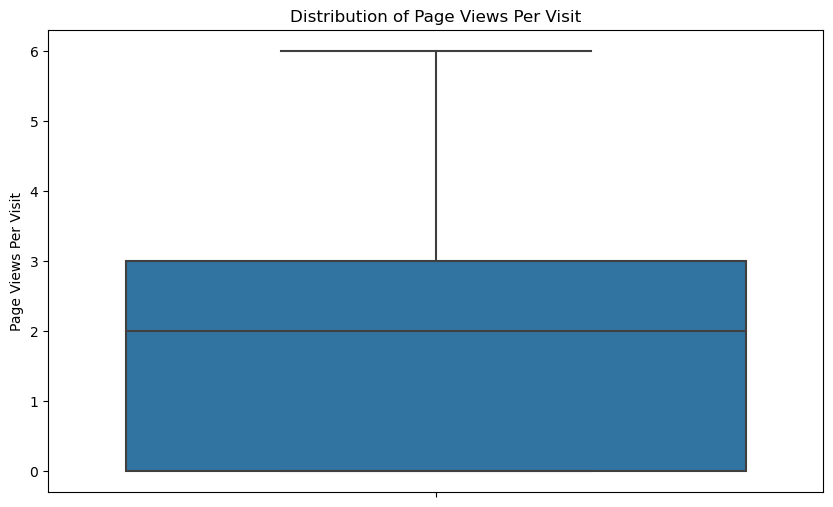

In [63]:
# Page Views Per Visit After outlier handling
plt.figure(figsize=[10,6])
box = sns.boxplot(data=leads, y="Page Views Per Visit")
plt.title('Distribution of Page Views Per Visit')
plt.show()

#### lets look at the different columns against converted

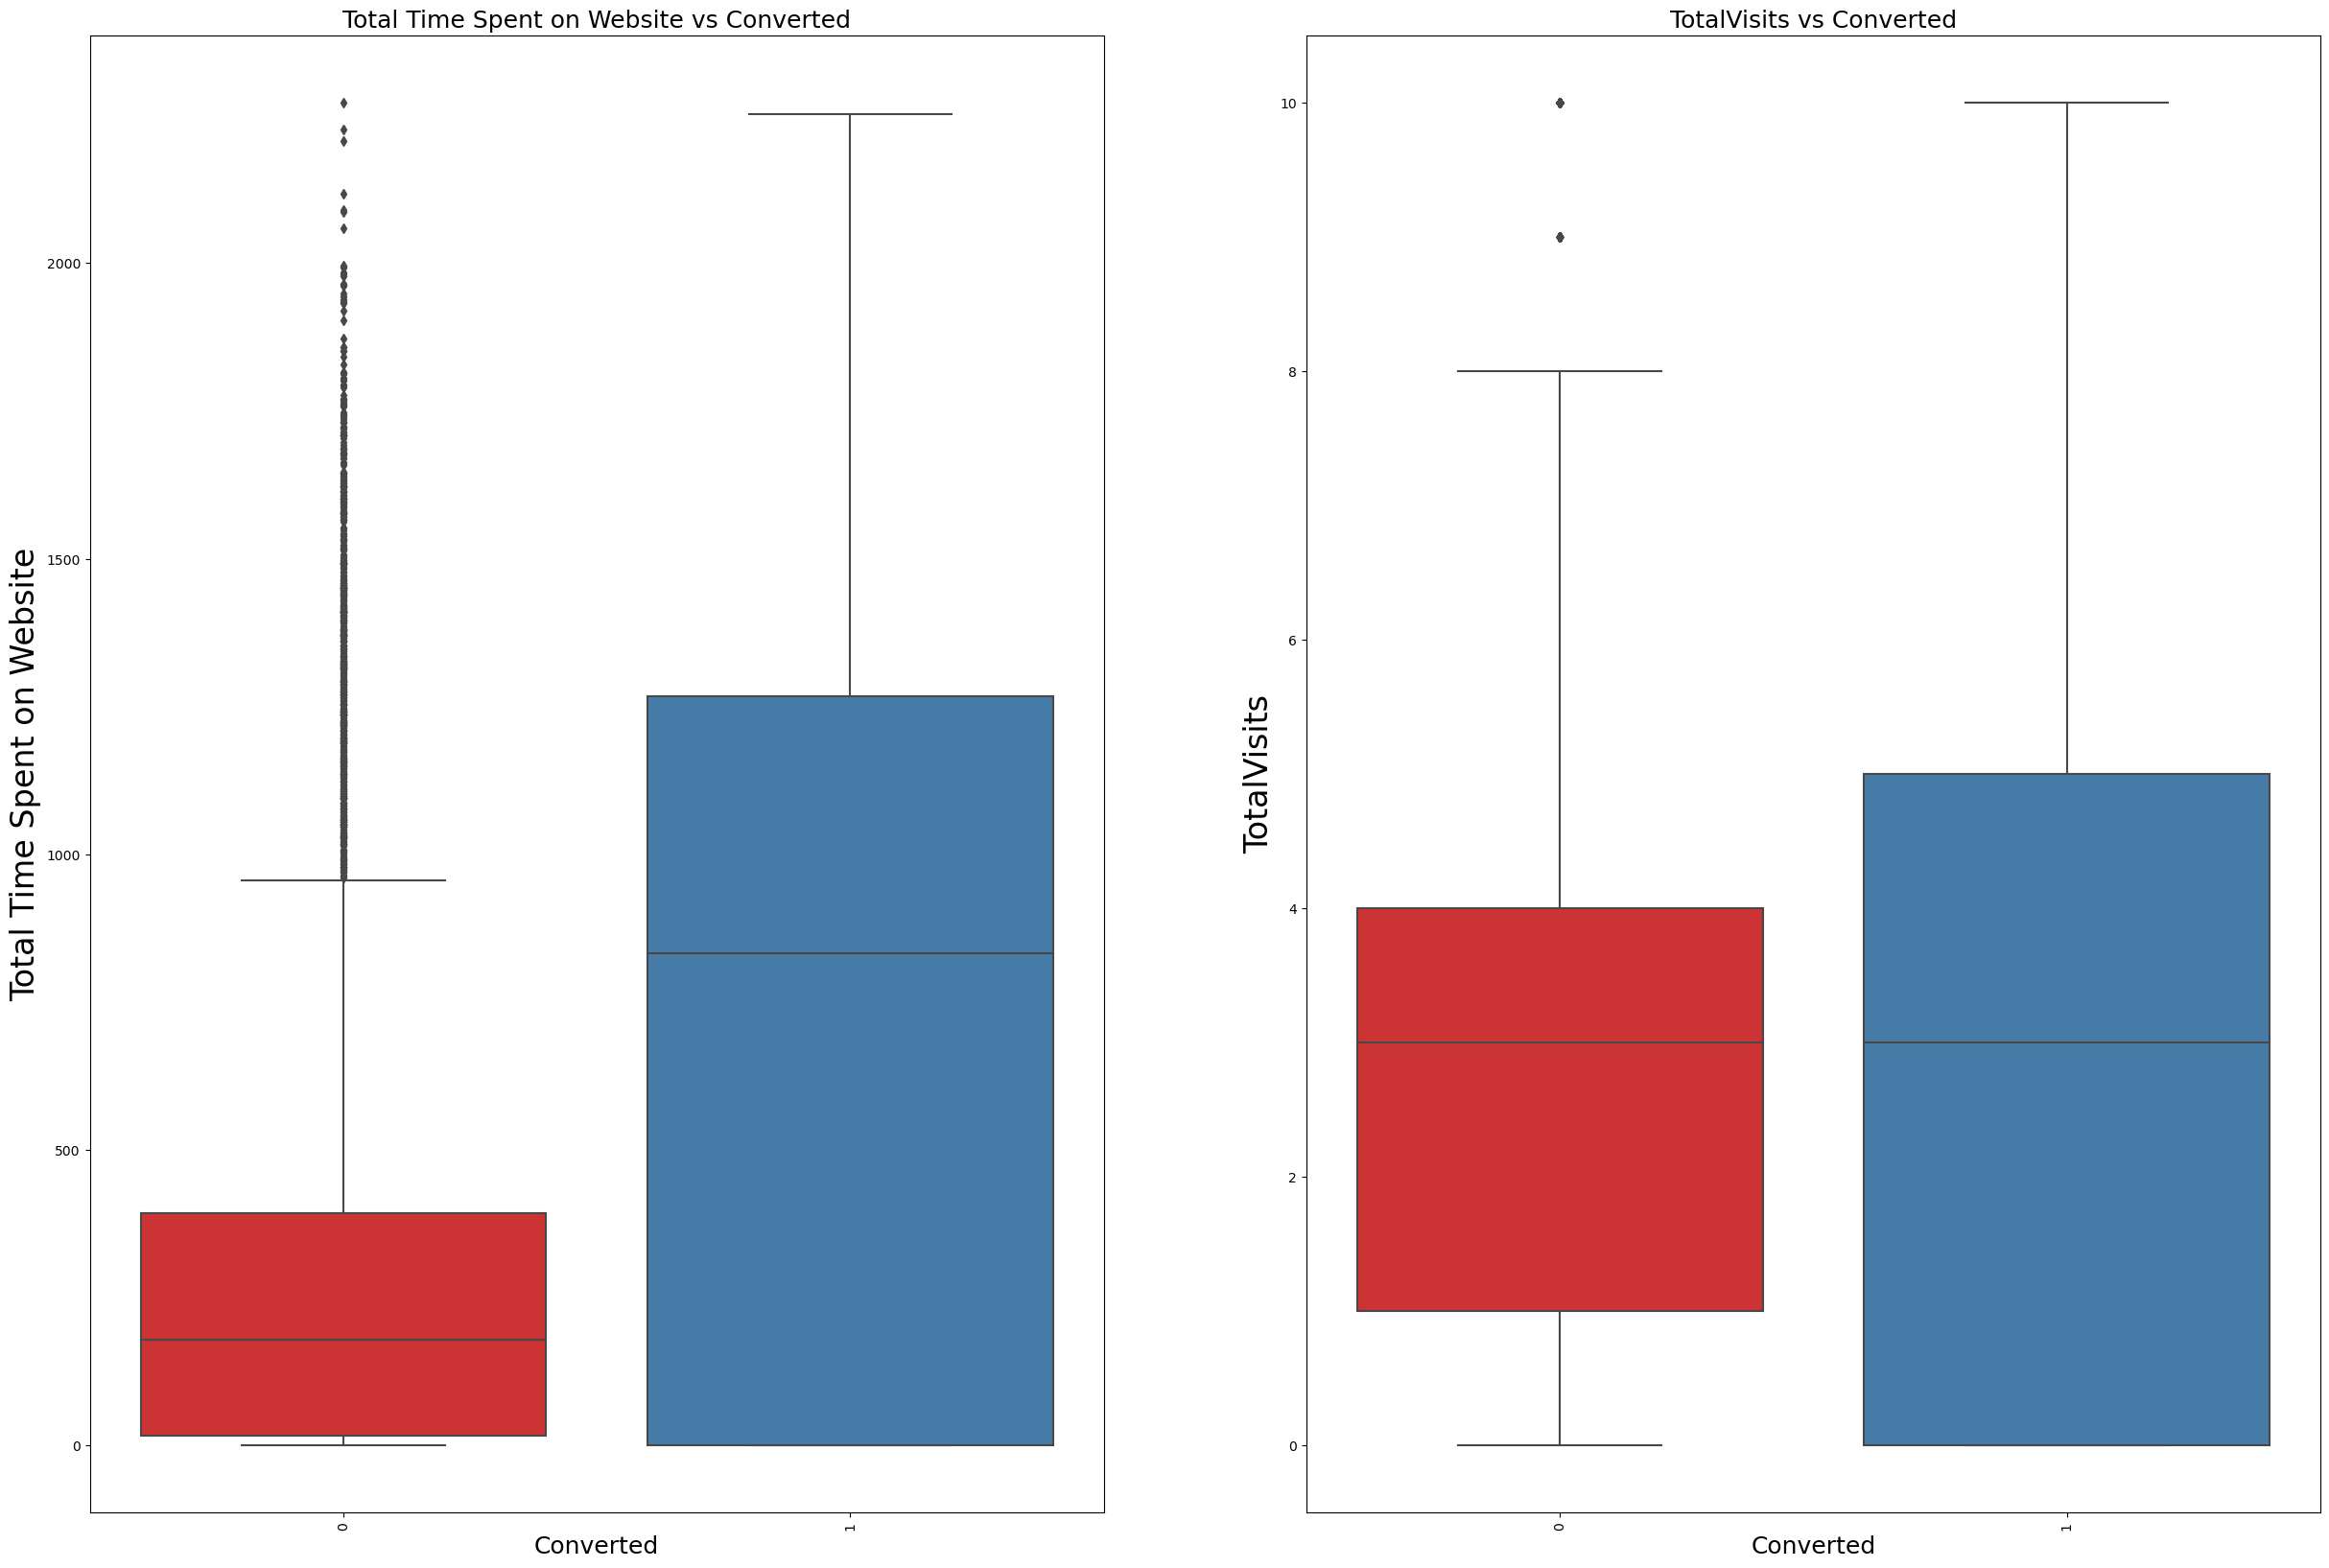

In [66]:
# Plot for 

plt.figure(figsize = (30,20))
plt.subplot(1,2,1)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads ,palette='Set1')
plt.title('Total Time Spent on Website vs Converted', fontsize = 18)
plt.xticks(rotation=90)
plt.xlabel('Converted', fontsize = 18)
plt.ylabel('Total Time Spent on Website', fontsize = 24)


plt.subplot(1,2,2)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads ,palette='Set1')
plt.title('TotalVisits vs Converted', fontsize = 18)
plt.xticks(rotation=90)
plt.xlabel('Converted', fontsize = 18)
plt.ylabel('TotalVisits', fontsize = 24)

plt.show()


### Plotting Graphs for columns against target variable `converted`. 

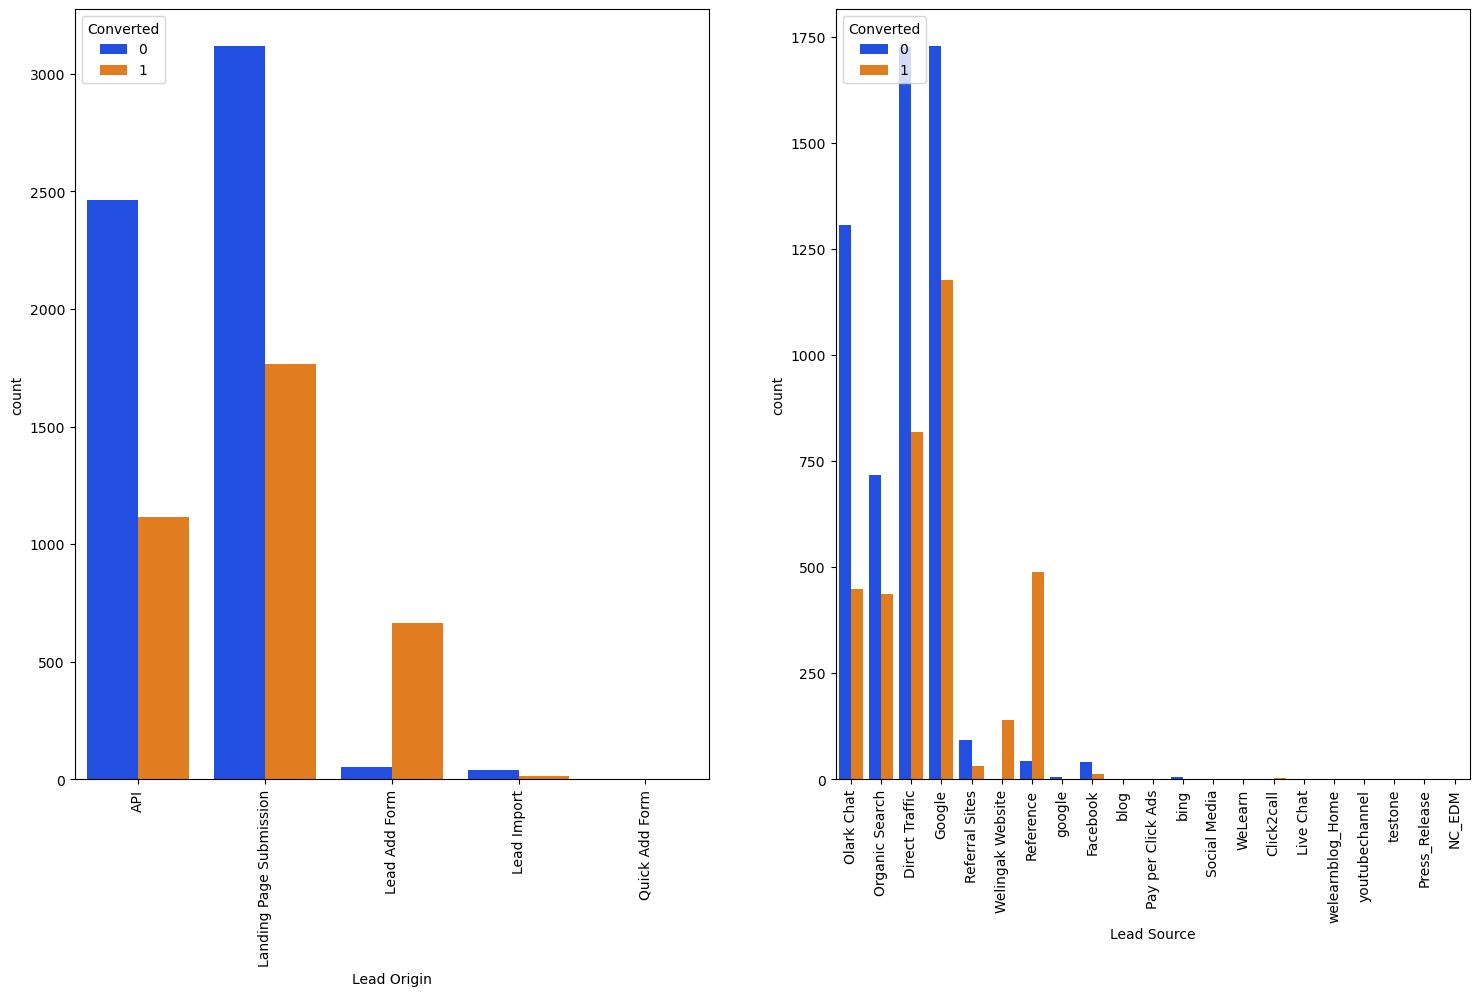

In [68]:
#cpuntplot for Lead origin and lead source against converted 
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads, palette='bright')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='bright')
plt.xticks(rotation = 90)



plt.show()

#### Lead Origin

* Lead add form has max number of conversion rate but they have less number of leads
* Landing page submission has less number of conversion rate but they have more number of leads

#### Lead Source 

* Google and Direct traffic has maximum number of leads.

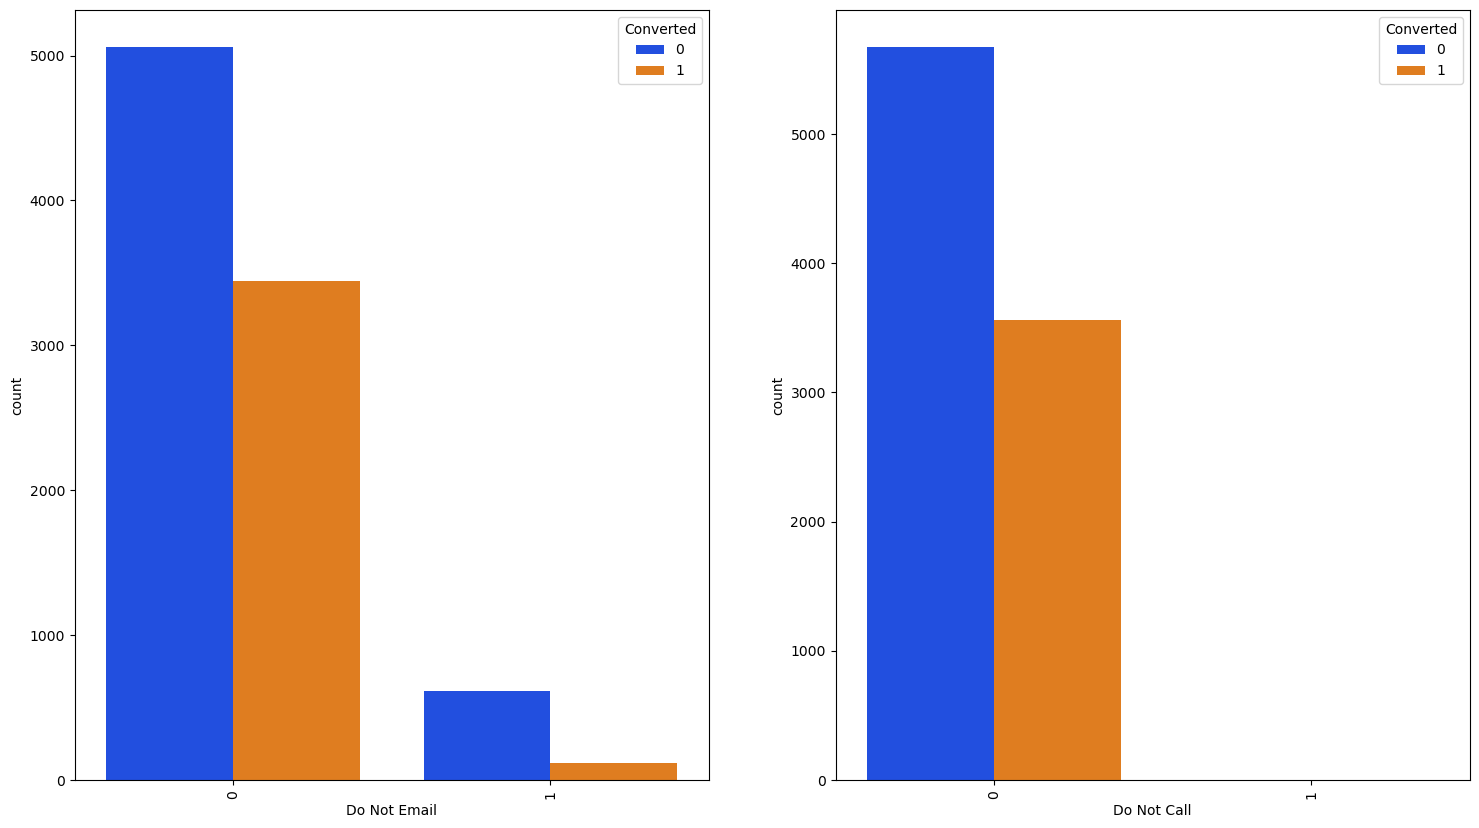

In [70]:
# countplot fot Do not email and do not call againt converted 
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)



plt.show()

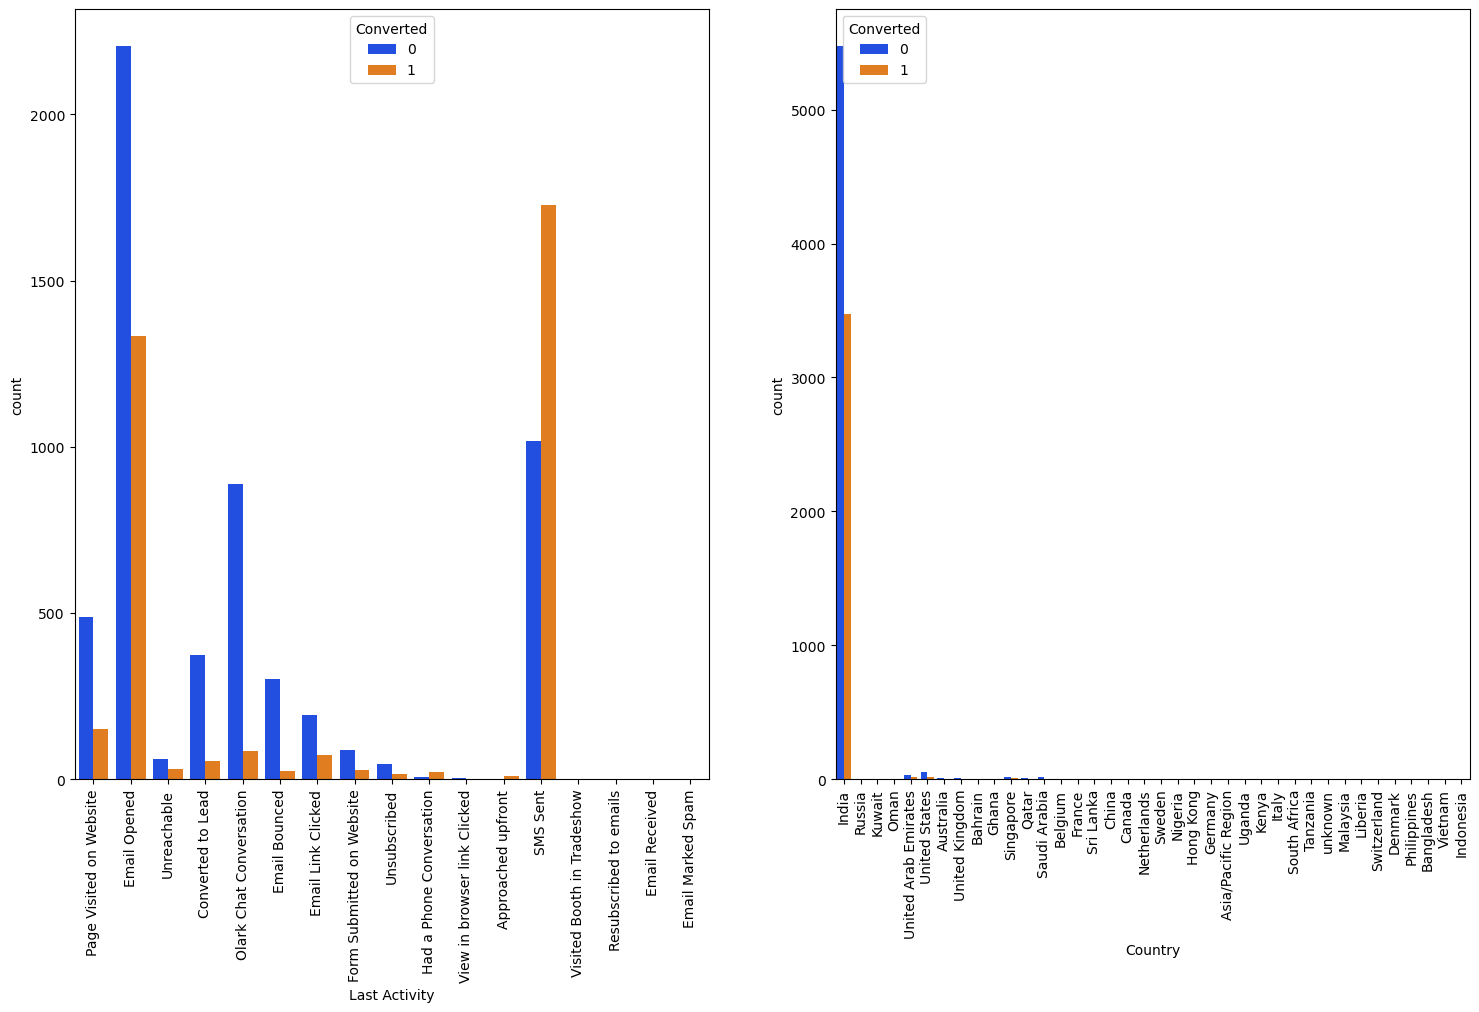

In [71]:
# Countplot for Last activity and country against converted 
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = "Country", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

#### Checking percentage of values belonging to India

In [72]:
len(leads[leads['Country'] == 'India']) / len(leads) * 100

96.8939393939394

#### Last Activity

* Most of Leads have their last activity Email opened 
* SMS sent last activity has good conversion rate

#### Country

* We can observe that most of the values belong to India i.e. 96.8939393939394%. Hence our country variable is imbalanced os lets drop it

In [73]:
leads.drop(['Country'], 1, inplace = True)

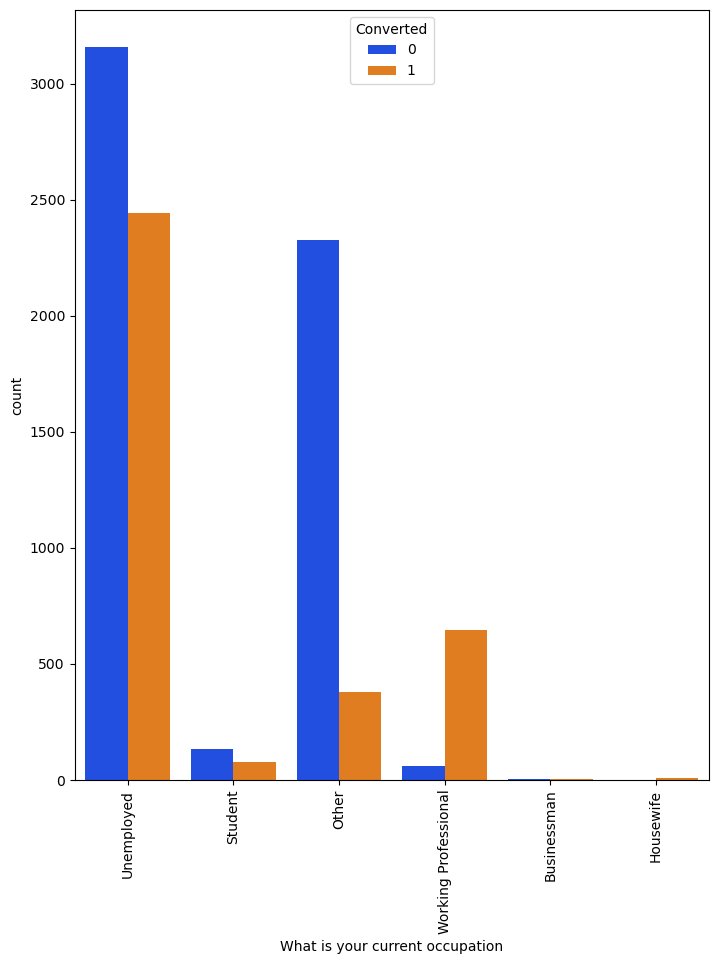

In [75]:
# Countplot for What is your current occupation against Converted 
plt.figure(figsize = (18,10))

plt.subplot(1,2,2)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

#### What is your current occupation

* Working professional has high conversion rate
* Unemployed has Maximum number of leads but conversion rate is less 

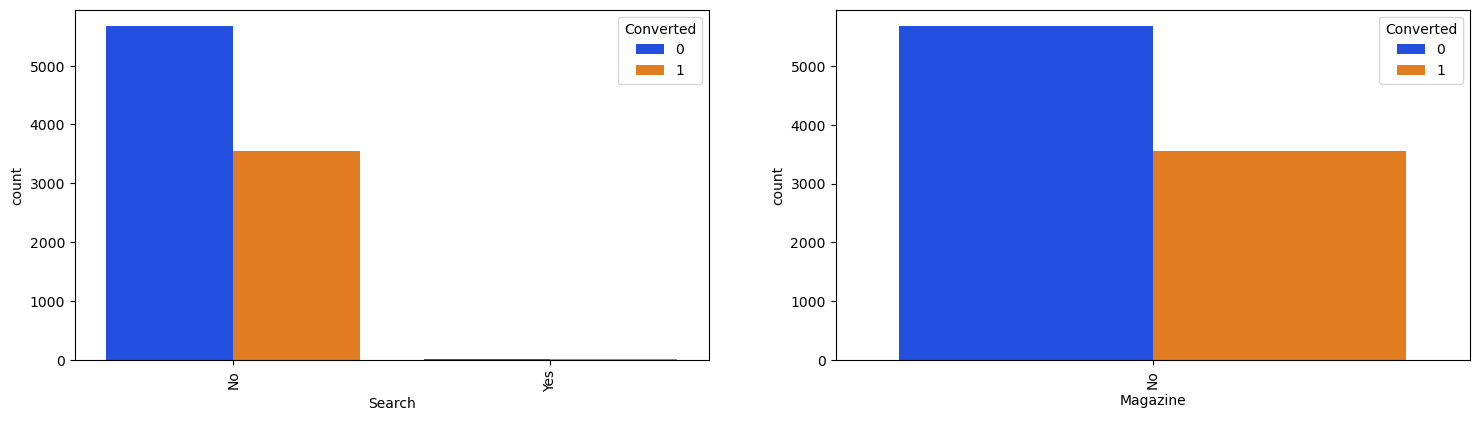

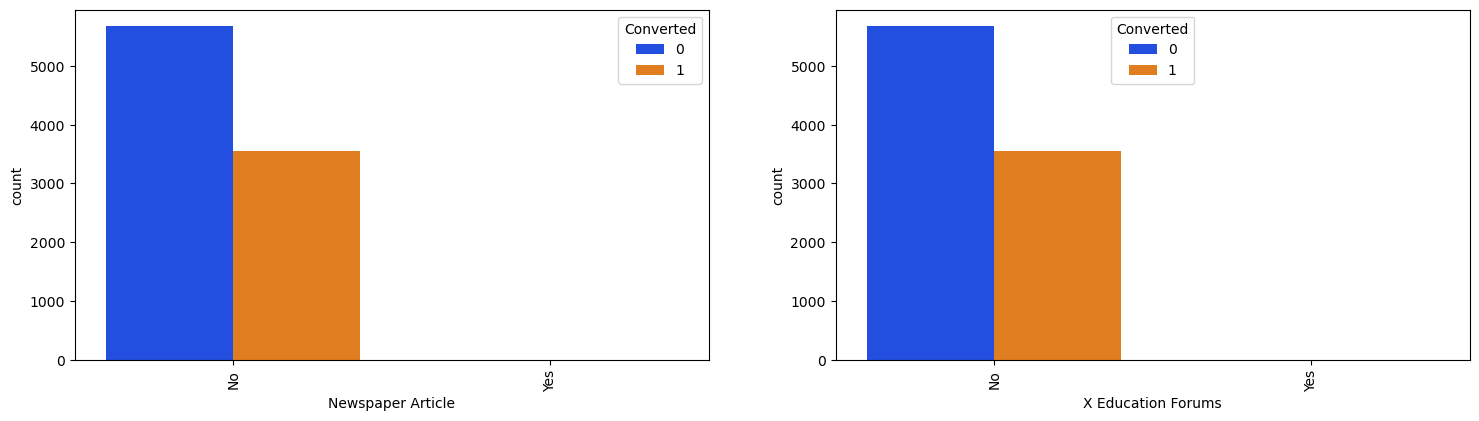

In [76]:
# countplot for Search, magazine, newspaper artical and X education forums against Converted 
plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
sns.countplot(x = "Search", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "Magazine", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

* We can observe that search, Magazine, Newspaper Artical and X Education Forums have imbalanced data and hence these columns needs to dropped.

In [190]:
leads.drop(['Search','Magazine','Newspaper Article','X Education Forums'], 1, inplace = True)

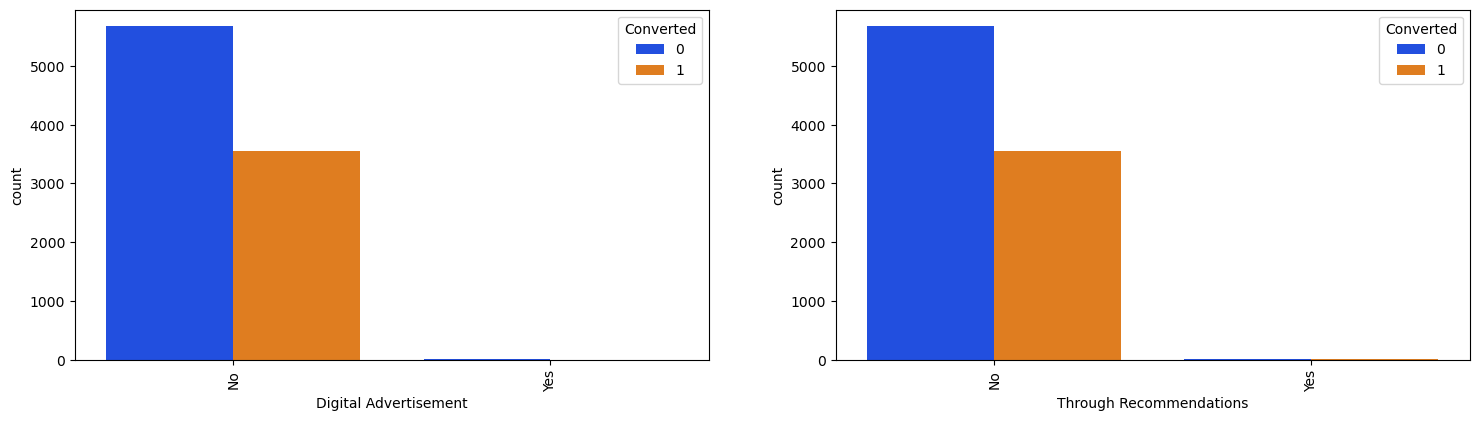

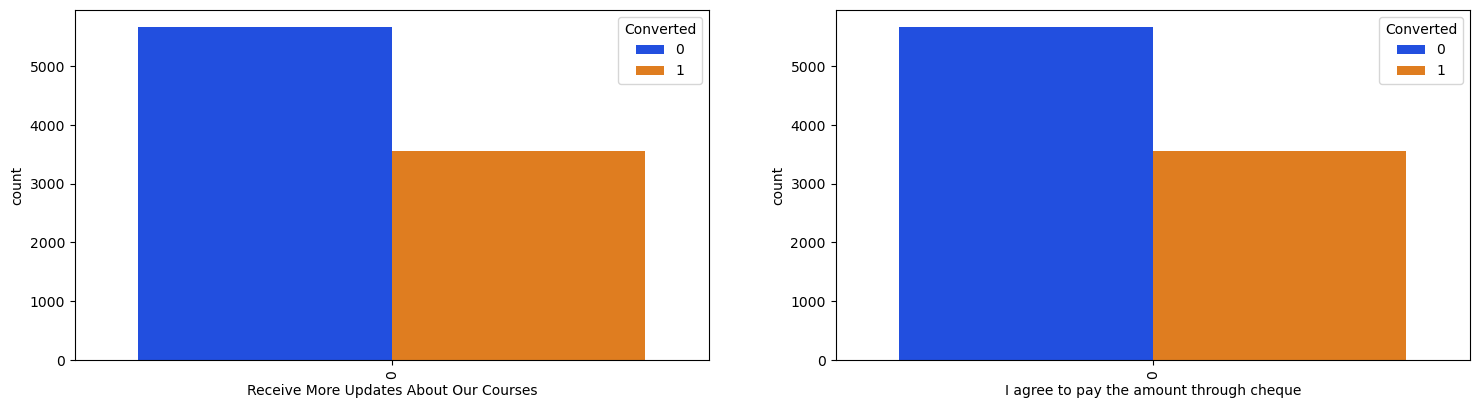

In [78]:
# countplot for Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses and 
# I agree to pay the amount through cheque against Converted 
plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

* We can observe that all the above columns have imbalanced data and hence these have to be dropped

In [79]:
leads.drop(['Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','I agree to pay the amount through cheque'], 1, inplace = True)

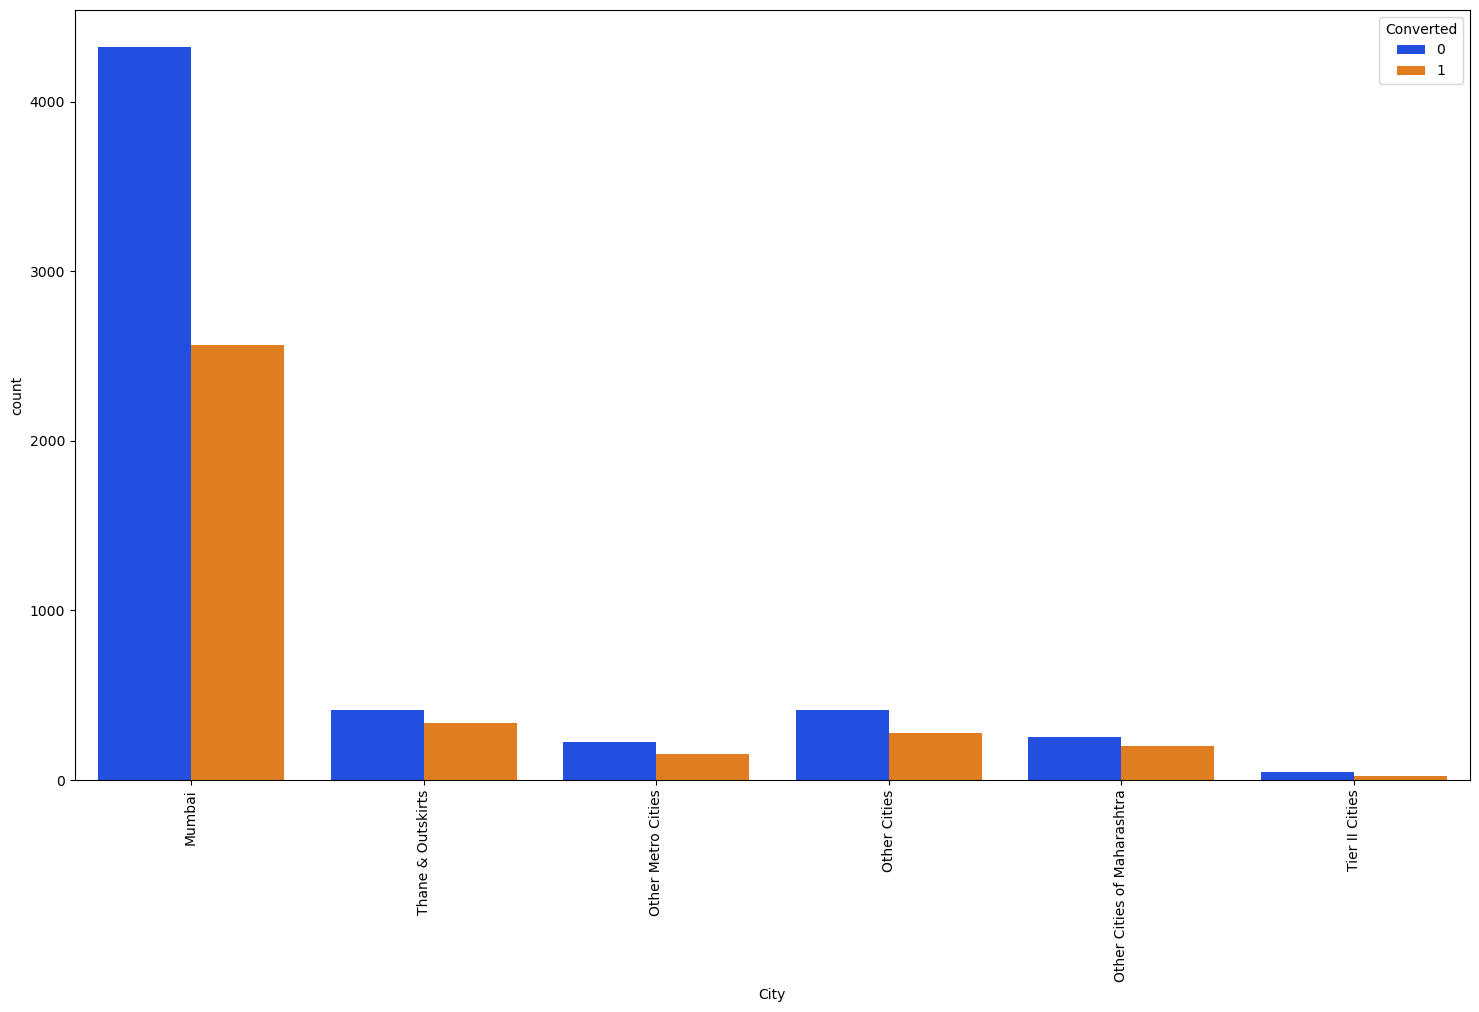

In [80]:
plt.figure(figsize = (18,10))

sns.countplot(x = "City", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

#### City

* Mumbai has max leads from mumbai and has good conversion rate

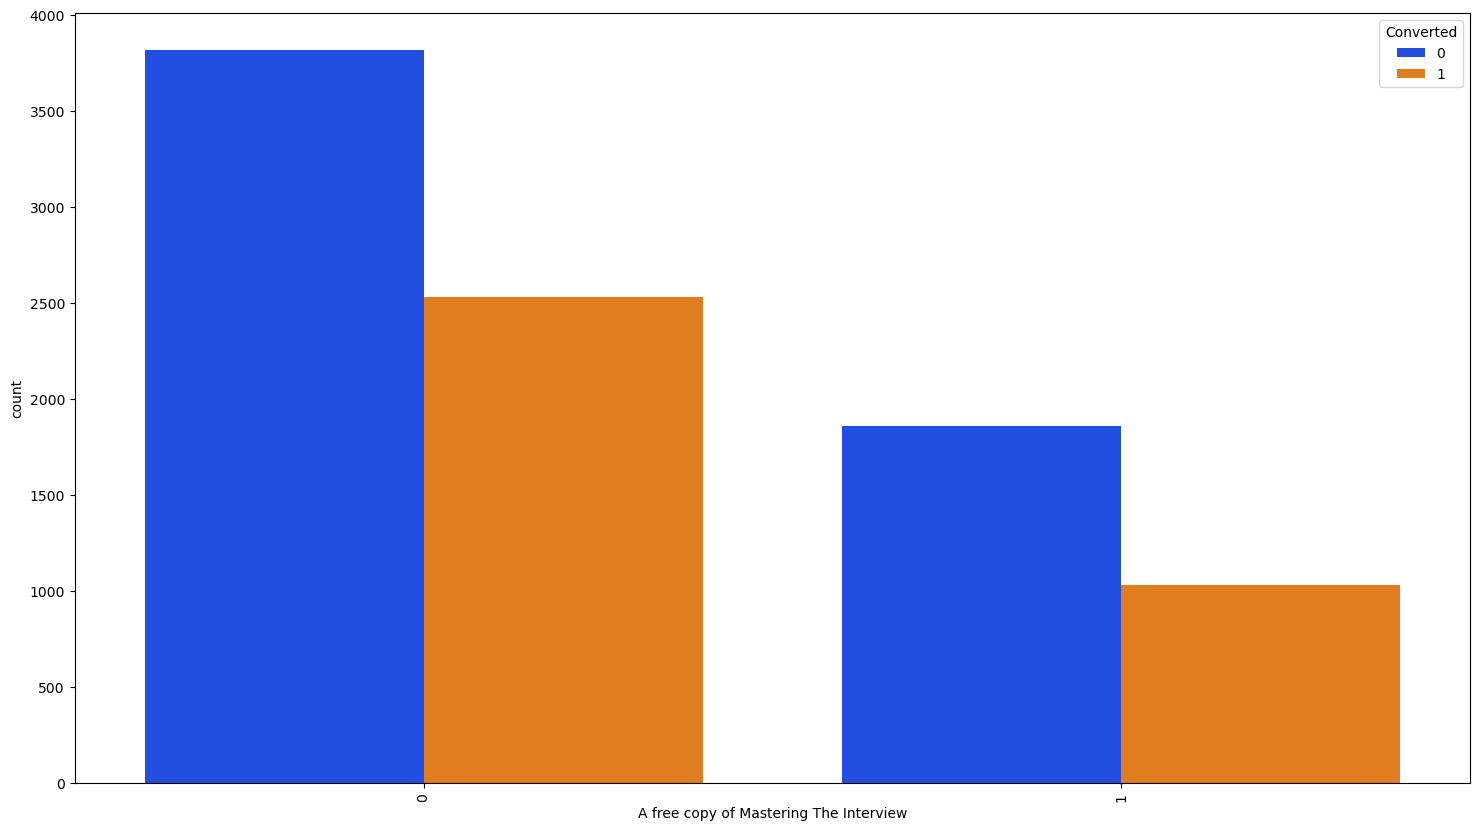

In [81]:
plt.figure(figsize = (18,10))

sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

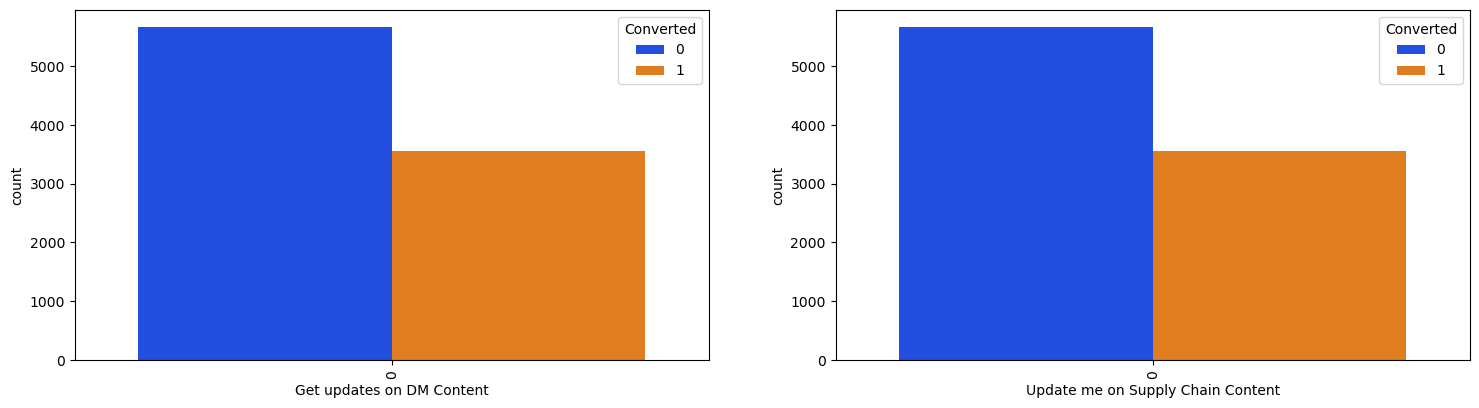

In [83]:
plt.figure(figsize = (18,10))

plt.subplot(2,2,1)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads,palette='bright')
plt.xticks(rotation = 90)

plt.show()

* We can observe the above columns have imbalanced data and hence needs to be dropped

In [84]:
leads.drop(['Get updates on DM Content','Update me on Supply Chain Content'], 1 , inplace=True)

## Step 6 : Standardization of variables and Train-Test Split

#### Converting categorical variables to numeric columns using getdummies

In [85]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Magazine,Newspaper Article,X Education Forums,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,...,No,No,No,No,Interested in other courses,Low in Relevance,Select,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,...,No,No,No,No,Ringing,Not Sure,Select,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,Ringing,Not Sure,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,...,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,0,Modified


#### getting a list of categorical columns

In [86]:
categorical_columns= leads.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'],
      dtype='object')

In [87]:
dummy = pd.get_dummies(leads['Lead Origin'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Source'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Activity'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Specialization'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['How did you hear about X Education'],prefix = 'education_' , drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['What is your current occupation'],prefix = 'occupation_' , drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['What matters most to you in choosing a course'],prefix = 'course_sel_', drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Tags'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Quality'],prefix = 'lead_quality_', drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Profile'],prefix = 'lead_profile_', drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['City'], drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Notable Activity'],prefix='last_notable_act' , drop_first=True)
leads = pd.concat([leads, dummy], axis = 1)

leads.drop(categorical_columns, 1, inplace = True)

#### Assigning response variable to y and rest to X

In [88]:
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [89]:
#### Splitting the data into train and test

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Check data type and standardize all numeric columns

In [91]:
leads.dtypes

Do Not Email                                       int64
Do Not Call                                        int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
                                                  ...   
last_notable_act_Resubscribed to emails            uint8
last_notable_act_SMS Sent                          uint8
last_notable_act_Unreachable                       uint8
last_notable_act_Unsubscribed                      uint8
last_notable_act_View in browser link Clicked      uint8
Length: 134, dtype: object

In [92]:
scaler = StandardScaler()
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,...,last_notable_act_Form Submitted on Website,last_notable_act_Had a Phone Conversation,last_notable_act_Modified,last_notable_act_Olark Chat Conversation,last_notable_act_Page Visited on Website,last_notable_act_Resubscribed to emails,last_notable_act_SMS Sent,last_notable_act_Unreachable,last_notable_act_Unsubscribed,last_notable_act_View in browser link Clicked
1871,-0.291638,-0.017587,-1.121955,-0.885371,-1.234699,-0.673169,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,-0.291638,-0.017587,0.313260,0.005716,-0.493295,1.485511,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,-0.291638,-0.017587,0.672063,-0.691418,0.158918,-0.673169,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-0.291638,-0.017587,0.672063,1.365219,1.552535,-0.673169,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.291638,-0.017587,-1.121955,-0.885371,-1.234699,-0.673169,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 7 : Logistic Model Building

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [115]:


rfe = RFE(logreg, step = 15)            
rfe = rfe.fit(X_train, y_train)

In [116]:
rfe.support_

array([False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False,

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 4),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 5),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 3),
 ('Quick Add Form', False, 3),
 ('Direct Traffic', True, 1),
 ('Facebook', True, 1),
 ('Google', False, 2),
 ('Live Chat', False, 6),
 ('NC_EDM', True, 1),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 2),
 ('Pay per Click Ads', False, 6),
 ('Press_Release', False, 5),
 ('Reference', True, 1),
 ('Referral Sites', False, 2),
 ('Social Media', False, 3),
 ('WeLearn', False, 6),
 ('Welingak Website', True, 1),
 ('bing', False, 6),
 ('blog', False, 4),
 ('google', True, 1),
 ('testone', False, 6),
 ('welearnblog_Home', False, 4),
 ('youtubechannel', False, 4),
 ('Converted to Lead', True, 1),
 ('Email Bounced', True, 1),
 ('Email Link Clicked', False, 4),
 ('Email Marked Sp

In [118]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Landing Page Submission',
       'Lead Add Form', 'Direct Traffic', 'Facebook', 'NC_EDM', 'Olark Chat',
       'Reference', 'Welingak Website', 'google', 'Converted to Lead',
       'Email Bounced', 'Olark Chat Conversation', 'Page Visited on Website',
       'SMS Sent', 'E-COMMERCE', 'Hospitality Management',
       'IT Projects Management', 'International Business',
       'Rural and Agribusiness', 'Supply Chain Management',
       'Travel and Tourism', 'education__Email', 'education__Multiple Sources',
       'education__Select', 'occupation__Housewife', 'occupation__Other',
       'occupation__Unemployed', 'occupation__Working Professional', 'Busy',
       'Closed by Horizzon', 'Diploma holder (Not Eligible)',
       'Interested  in full time MBA', 'Interested in Next batch',
       'Interested in other courses', 'Lateral student', 'Lost to EINS',
       'Lost to Others', 'Not doing further education', 'Ringing',
       'Shall t

In [119]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Import',
       'Quick Add Form', 'Google', 'Live Chat', 'Organic Search',
       'Pay per Click Ads', 'Press_Release', 'Referral Sites', 'Social Media',
       'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home',
       'youtubechannel', 'Email Link Clicked', 'Email Marked Spam',
       'Email Opened', 'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Resubscribed to emails', 'Unreachable',
       'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow', 'Business Administration', 'E-Business',
       'Finance Management', 'Healthcare Management',
       'Human Resource Management', 'Marketing Management',
       'Media and Advertising', 'Operations Management', 'Retail Management',
       'Services Excellence', 'education__Online Search', 'education__Other',
       'education__SMS', 'education__Social Med

### Building 1st Logistic Regression Model

In [120]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.5
Date:                Sun, 26 Feb 2023   Deviance:                       2119.0
Time:                        18:44:32   Pearson chi2:                 1.51e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6328
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.5693      0.732     -3.512      0.000      -4.003      -1.135
TotalVisits                                           0.1880      0.079      2.381      0.017       0.033       0.343
Total Time Spent on Website                           1.0247      0.067     15.366      0.000       0.894       1.155
Landing Page Submission                              -0.6573      0.203     -3.232      0.001      -1.056      -0.259
Lead Add Form                                         0.7991      0.784      1.019      0.308      -0.738       2.336
Direct Traffic                                        0.0487      0.185      0.264      0.792      -0.313       0.410
Facebook                                             -0.6553      0.749     -0.874      0.382      -2.124       0.814
NC_EDM                                               26.8012   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Olark Chat                                            0.8214      0.210      3.920      0.000       0.411       1.232
Reference                                            -0.4623      0.852     -0.543      0.587      -2.131       1.207
Welingak Website                                      2.6749      1.062      2.518      0.012       0.593       4.757
google                                              -22.6611    9.1e+04     -0.000      1.000   -1.78e+05    1.78e+05
Converted to Lead                                    -0.5638      0.425     -1.326      0.185      -1.397       0.269
Email Bounced                                        -1.8149      0.619     -2.932      0.003      -3.028      -0.602
Olark Chat Conversation                              -0.6860      0.325     -2.111      0.035      -1.323      -0.049
Page Visited on Website                              -0.6636      0.267     -2.482      0.013      -1.188      -0.139
SMS Sent                                              1.3435      0.277      4.856      0.000       0.801       1.886
E-COMMERCE                                            0.4627      0.487      0.950      0.342      -0.492       1.417
Hospitality Management                               -0.7248      0.545     -1.329      0.184      -1.794       0.344
IT Projects Management                                0.3993      0.323      1.235      0.217      -0.234       1.033
International Business                               -0.6800      0.464     -1.467      0.142      -1.589       0.229
Rural and Agribusiness                                0.4182      0.773      0.541      0.588      -1.097       1.933
Supply Chain Management                              -0.7537      0.371     -2.030      0.042      -1.482      -0.026
Travel and Tour

#### Dropping 'Lateral student' variable since it has a very high p-value.

In [121]:
col = col.drop('Lateral student',1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Landing Page Submission',
       'Lead Add Form', 'Direct Traffic', 'Facebook', 'NC_EDM', 'Olark Chat',
       'Reference', 'Welingak Website', 'google', 'Converted to Lead',
       'Email Bounced', 'Olark Chat Conversation', 'Page Visited on Website',
       'SMS Sent', 'E-COMMERCE', 'Hospitality Management',
       'IT Projects Management', 'International Business',
       'Rural and Agribusiness', 'Supply Chain Management',
       'Travel and Tourism', 'education__Email', 'education__Multiple Sources',
       'education__Select', 'occupation__Housewife', 'occupation__Other',
       'occupation__Unemployed', 'occupation__Working Professional', 'Busy',
       'Closed by Horizzon', 'Diploma holder (Not Eligible)',
       'Interested  in full time MBA', 'Interested in Next batch',
       'Interested in other courses', 'Lost to EINS', 'Lost to Others',
       'Not doing further education', 'Ringing',
       'Shall take in the next com

### Building 2nd Logistic Regression Model

In [122]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6402
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.8
Date:                Sun, 26 Feb 2023   Deviance:                       2131.7
Time:                        18:44:48   Pearson chi2:                 1.57e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6320
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.1404      0.699     -3.063      0.002      -3.510      -0.771
TotalVisits                                           0.1818      0.079      2.309      0.021       0.028       0.336
Total Time Spent on Website                           1.0177      0.066     15.334      0.000       0.888       1.148
Landing Page Submission                              -0.6667      0.203     -3.290      0.001      -1.064      -0.269
Lead Add Form                                         0.7716      0.782      0.986      0.324      -0.762       2.305
Direct Traffic                                        0.0340      0.184      0.185      0.853      -0.327       0.395
Facebook                                             -0.6894      0.746     -0.924      0.356      -2.152       0.774
NC_EDM                                               26.8349   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Olark Chat                                            0.8110      0.209      3.886      0.000       0.402       1.220
Reference                                            -0.3403      0.851     -0.400      0.689      -2.009       1.328
Welingak Website                                      2.6779      1.061      2.523      0.012       0.598       4.758
google                                              -22.6655    9.1e+04     -0.000      1.000   -1.78e+05    1.78e+05
Converted to Lead                                    -0.5566      0.422     -1.317      0.188      -1.385       0.272
Email Bounced                                        -1.8042      0.621     -2.906      0.004      -3.021      -0.588
Olark Chat Conversation                              -0.6939      0.324     -2.141      0.032      -1.329      -0.059
Page Visited on Website                              -0.6401      0.267     -2.400      0.016      -1.163      -0.117
SMS Sent                                              1.4016      0.275      5.100      0.000       0.863       1.940
E-COMMERCE                                            0.4533      0.486      0.933      0.351      -0.499       1.406
Hospitality Management                               -0.7317      0.542     -1.351      0.177      -1.793       0.330
IT Projects Management                                0.4055      0.323      1.257      0.209      -0.227       1.038
International Business                               -0.6792      0.464     -1.465      0.143      -1.588       0.229
Rural and Agribusiness                                0.4098      0.771      0.532      0.595      -1.101       1.921
Supply Chain Management                              -0.7474      0.370     -2.018      0.044      -1.474      -0.021
Travel and Tour

#### Dropping 'wrong number given' variable since it has a very high p-value.

In [123]:
col = col.drop('wrong number given',1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Landing Page Submission',
       'Lead Add Form', 'Direct Traffic', 'Facebook', 'NC_EDM', 'Olark Chat',
       'Reference', 'Welingak Website', 'google', 'Converted to Lead',
       'Email Bounced', 'Olark Chat Conversation', 'Page Visited on Website',
       'SMS Sent', 'E-COMMERCE', 'Hospitality Management',
       'IT Projects Management', 'International Business',
       'Rural and Agribusiness', 'Supply Chain Management',
       'Travel and Tourism', 'education__Email', 'education__Multiple Sources',
       'education__Select', 'occupation__Housewife', 'occupation__Other',
       'occupation__Unemployed', 'occupation__Working Professional', 'Busy',
       'Closed by Horizzon', 'Diploma holder (Not Eligible)',
       'Interested  in full time MBA', 'Interested in Next batch',
       'Interested in other courses', 'Lost to EINS', 'Lost to Others',
       'Not doing further education', 'Ringing',
       'Shall take in the next com

### Building 3rd Logistic Regression Model

In [124]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6403
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1069.9
Date:                Sun, 26 Feb 2023   Deviance:                       2139.8
Time:                        18:45:03   Pearson chi2:                 1.55e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6316
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.5235      0.700     -3.603      0.000      -3.896      -1.151
TotalVisits                                           0.1815      0.078      2.314      0.021       0.028       0.335
Total Time Spent on Website                           1.0162      0.066     15.357      0.000       0.886       1.146
Landing Page Submission                              -0.6704      0.202     -3.322      0.001      -1.066      -0.275
Lead Add Form                                         0.7704      0.781      0.986      0.324      -0.760       2.301
Direct Traffic                                        0.0243      0.183      0.133      0.894      -0.334       0.383
Facebook                                             -0.6923      0.746     -0.929      0.353      -2.154       0.769
NC_EDM                                               25.8206   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Olark Chat                                            0.8168      0.208      3.918      0.000       0.408       1.225
Reference                                            -0.3391      0.851     -0.399      0.690      -2.006       1.328
Welingak Website                                      2.6795      1.060      2.527      0.012       0.601       4.758
google                                              -21.6792   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
Converted to Lead                                    -0.5424      0.424     -1.280      0.201      -1.373       0.288
Email Bounced                                        -1.8021      0.620     -2.908      0.004      -3.017      -0.587
Olark Chat Conversation                              -0.6944      0.324     -2.140      0.032      -1.330      -0.058
Page Visited on Website                              -0.6385      0.267     -2.393      0.017      -1.162      -0.116
SMS Sent                                              1.4042      0.275      5.106      0.000       0.865       1.943
E-COMMERCE                                            0.3934      0.476      0.826      0.409      -0.540       1.327
Hospitality Management                               -0.7122      0.543     -1.312      0.190      -1.776       0.352
IT Projects Management                                0.4060      0.322      1.261      0.207      -0.225       1.037
International Business                               -0.6735      0.463     -1.454      0.146      -1.581       0.234
Rural and Agribusiness                                0.4180      0.772      0.541      0.588      -1.096       1.932
Supply Chain Management                              -0.7396      0.371     -1.996      0.046      -1.466      -0.013
Travel and Tour

#### Dropping 'invalid number' variable since it has significantly high p-value.

In [125]:
col = col.drop('invalid number',1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Landing Page Submission',
       'Lead Add Form', 'Direct Traffic', 'Facebook', 'NC_EDM', 'Olark Chat',
       'Reference', 'Welingak Website', 'google', 'Converted to Lead',
       'Email Bounced', 'Olark Chat Conversation', 'Page Visited on Website',
       'SMS Sent', 'E-COMMERCE', 'Hospitality Management',
       'IT Projects Management', 'International Business',
       'Rural and Agribusiness', 'Supply Chain Management',
       'Travel and Tourism', 'education__Email', 'education__Multiple Sources',
       'education__Select', 'occupation__Housewife', 'occupation__Other',
       'occupation__Unemployed', 'occupation__Working Professional', 'Busy',
       'Closed by Horizzon', 'Diploma holder (Not Eligible)',
       'Interested  in full time MBA', 'Interested in Next batch',
       'Interested in other courses', 'Lost to EINS', 'Lost to Others',
       'Not doing further education', 'Ringing',
       'Shall take in the next com

### Building 4th Logistic Regression Model

In [126]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1071.3
Date:                Sun, 26 Feb 2023   Deviance:                       2142.7
Time:                        18:45:10   Pearson chi2:                 1.55e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6314
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -2.7415      0.699     -3.920      0.000      -4.112      -1.371
TotalVisits                                           0.1813      0.078      2.313      0.021       0.028       0.335
Total Time Spent on Website                           1.0170      0.066     15.395      0.000       0.887       1.146
Landing Page Submission                              -0.6854      0.201     -3.405      0.001      -1.080      -0.291
Lead Add Form                                         0.7676      0.780      0.984      0.325      -0.761       2.297
Direct Traffic                                        0.0356      0.182      0.195      0.845      -0.322       0.393
Facebook                                             -0.6947      0.746     -0.932      0.351      -2.156       0.767
NC_EDM                                               25.8145   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Olark Chat                                            0.8147      0.208      3.910      0.000       0.406       1.223
Reference                                            -0.3483      0.850     -0.410      0.682      -2.015       1.318
Welingak Website                                      2.6796      1.060      2.529      0.011       0.603       4.757
google                                              -21.6797   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
Converted to Lead                                    -0.5380      0.424     -1.269      0.205      -1.369       0.293
Email Bounced                                        -1.7892      0.621     -2.881      0.004      -3.007      -0.572
Olark Chat Conversation                              -0.6915      0.325     -2.129      0.033      -1.328      -0.055
Page Visited on Website                              -0.6421      0.267     -2.407      0.016      -1.165      -0.119
SMS Sent                                              1.4115      0.275      5.129      0.000       0.872       1.951
E-COMMERCE                                            0.4249      0.477      0.890      0.373      -0.511       1.360
Hospitality Management                               -0.7020      0.544     -1.290      0.197      -1.768       0.364
IT Projects Management                                0.3771      0.319      1.182      0.237      -0.248       1.002
International Business                               -0.6726      0.463     -1.454      0.146      -1.579       0.234
Rural and Agribusiness                                0.4241      0.772      0.549      0.583      -1.090       1.938
Supply Chain Management                              -0.7405      0.370     -2.001      0.045      -1.466      -0.015
Travel and Tour

#### Check for the VIF values of the feature variables. 

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,occupation__Unemployed,17.15
3,Lead Add Form,16.78
49,lead_quality__Not Sure,14.93
8,Reference,13.27
27,occupation__Other,13.19
...,...,...
20,Rural and Agribusiness,1.02
62,last_notable_act_Unreachable,1.02
10,google,1.01
40,Shall take in the next coming month,1.01


#### Since all the values seem to be in order now so moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [128]:
# Getting the Predicted values on the train set
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.005494
6795    0.466020
3516    0.009230
8105    0.181275
3934    0.308156
4844    0.999470
3297    0.003467
8071    0.998012
987     0.045634
7423    0.999407
dtype: float64

In [129]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00549398, 0.46601989, 0.00922952, 0.18127538, 0.30815618,
       0.99947004, 0.00346689, 0.99801198, 0.04563391, 0.99940712])

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.005494,1871
1,0,0.466020,6795
2,0,0.009230,3516
3,0,0.181275,8105
4,0,0.308156,3934


In [131]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.005494,1871,0
1,0,0.466020,6795,0
2,0,0.009230,3516,0
3,0,0.181275,8105,0
4,0,0.308156,3934,0


In [132]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3852  150]
 [ 238 2228]]


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9400123685837971


In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9034874290348743

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9625187406296851

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.037481259370314844


In [138]:
# positive predictive value 
print (TP / float(TP+FP))

0.9369217830109335


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9418092909535453


### Step 8: Plotting the ROC Curve

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

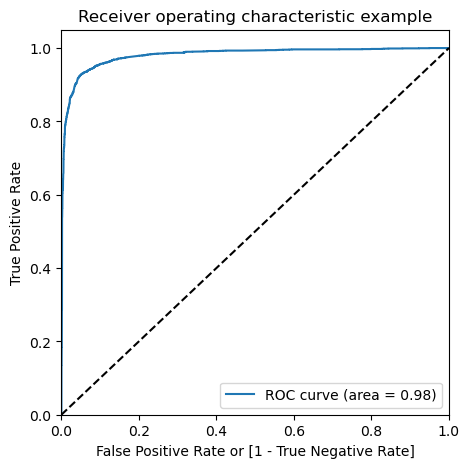

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 9: Making predictions on the test set

In [143]:
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [144]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Landing Page Submission,Lead Add Form,Direct Traffic,Facebook,NC_EDM,Olark Chat,Reference,Welingak Website,...,lead_profile__Select,lead_profile__Student of SomeSchool,Tier II Cities,last_notable_act_Email Bounced,last_notable_act_Email Link Clicked,last_notable_act_Had a Phone Conversation,last_notable_act_Modified,last_notable_act_Olark Chat Conversation,last_notable_act_SMS Sent,last_notable_act_Unreachable
4269,1.748474,0.964504,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2376,-1.121955,-0.885371,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
7766,0.672063,-0.777416,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9199,-1.121955,-0.885371,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4359,-1.121955,-0.885371,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
X_test_sm = sm.add_constant(X_test)

In [146]:
y_test_pred = res.predict(X_test_sm)

In [147]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID
4269,1,1,4269
2376,1,1,2376
7766,1,1,7766
9199,0,0,9199
4359,1,1,4359


In [148]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Converted_prob )
print(confusion)

[[1677    0]
 [   0 1095]]


In [149]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9400123685837971


In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9034874290348743

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9625187406296851

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.037481259370314844


In [153]:
# positive predictive value  (Precision)
print (TP / float(TP+FP))

0.9369217830109335


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9418092909535453


In [155]:
#Recall
print(TP/float(TP+FN))

0.9034874290348743


In [156]:
t1 = X_test[col]
t2 = pd.DataFrame(y_test)
t3 = pd.concat([t1,t2],axis=1)

In [157]:
t3.corr().sort_values(by='Converted', ascending=False)['Converted']*100

Converted                              100.000000
Will revert after reading the email     64.160083
last_notable_act_SMS Sent               35.937577
Total Time Spent on Website             35.776036
lead_quality__Might be                  34.572224
                                          ...    
occupation__Other                      -33.811702
lead_quality__Not Sure                 -43.396928
NC_EDM                                        NaN
google                                        NaN
Interested in Next batch                      NaN
Name: Converted, Length: 64, dtype: float64